In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('/content/cardio_dataset.csv').values
data = dataset[:,0:7]   #load first 7 columns
target = dataset[:,7]   #load 7th column

In [3]:
from sklearn.preprocessing import MinMaxScaler

target=np.reshape(target, (-1,1))  #only one column

scaler_data = MinMaxScaler(feature_range=(0,1))
scaler_target = MinMaxScaler()

# first computes the minimum and maximum values of each feature in data (the fitting step), and then scales the data accordingly (the transformation step)
data_scaled=scaler_data.fit_transform(data)
target_scaled=scaler_target.fit_transform(target)

print(scaler_data)

MinMaxScaler()


Split the data randomly to training datat and validation data. 20% for validation

In [4]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(data_scaled, target_scaled, test_size=0.2)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, input_dim=7, activation='sigmoid',kernel_initializer='normal'))    #ist HL



*   The sigmoid activation function squashes the input values between
0 and 1, which makes it particularly useful for binary classification problems or when you need output values in the range [0, 1].

*   By randomly initializing weights from a normal distribution, you provide the network with a diverse set of starting points, which can help in exploring the parameter space more effectively during optimization.



In [6]:
model.add(Dropout(0.5))

This adds a dropout layer with a dropout rate of 0.5, which randomly sets 50% of the input units to 0 at each update during training.

In [7]:
model.add(Dense(64, activation='sigmoid'))    #2nd HL
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid'))    #3rd HL
model.add(Dense(1, activation='linear'))    #4th HL

model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9941 (38.83 KB)
Trainable params: 9941 (38

In [8]:
from sklearn.metrics import r2_score
import keras

In [9]:
class CustomCallback(keras.callbacks.Callback):

    def on_epoch_end(self,epoch,logs=None):
        global predicted_result
        predicted_result=model.predict(test_data)
        r2=r2_score(test_target,predicted_result)
        print('epoch ',epoch,'- r2 score:',r2)

In [10]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Models/model-{epoch:03d}.model',monitor='val_loss',save_best_only=True,mode='auto')

In [12]:
history=model.fit(train_data,train_target,epochs=200,validation_data=(test_data,test_target),callbacks=[checkpoint,CustomCallback()])

Epoch 1/200
42/42 [==============================] - 0s 2ms/step
epoch  0 - r2 score: 0.022619492432582322
167/167 [==============================] - 6s 27ms/step - loss: 0.0373 - mse: 0.0373 - mae: 0.1453 - val_loss: 0.0231 - val_mse: 0.0231 - val_mae: 0.1162
Epoch 2/200
42/42 [==============================] - 0s 1ms/step
epoch  1 - r2 score: 0.03151075931869918
167/167 [==============================] - 3s 16ms/step - loss: 0.0247 - mse: 0.0247 - mae: 0.1200 - val_loss: 0.0229 - val_mse: 0.0229 - val_mae: 0.1168
Epoch 3/200
42/42 [==============================] - 0s 1ms/step
epoch  2 - r2 score: 0.046699913462144305
167/167 [==============================] - 2s 14ms/step - loss: 0.0237 - mse: 0.0237 - mae: 0.1178 - val_loss: 0.0225 - val_mse: 0.0225 - val_mae: 0.1147
Epoch 4/200
42/42 [==============================] - 0s 1ms/step
epoch  3 - r2 score: 0.05839704618438013
167/167 [==============================] - 2s 14ms/step - loss: 0.0227 - mse: 0.0227 - mae: 0.1151 - val_loss: 0

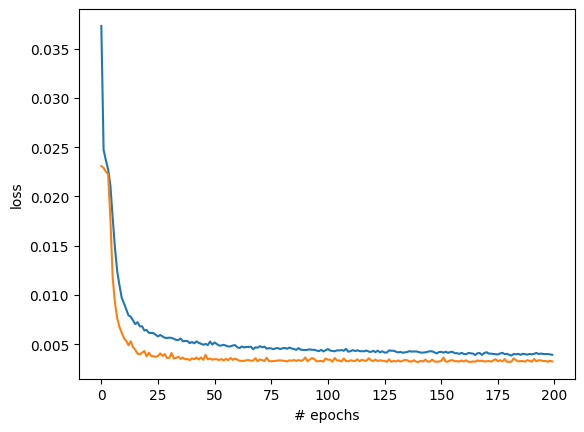

In [13]:
from matplotlib import pyplot as plt
plt.plot(model.history.history['loss'],label='Training Loss')
plt.plot(model.history.history['val_loss'],label='Validation Loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

In [14]:
print('actual:',test_target[:10].T)
print('predicted:',predicted_result[:10].T)

actual: [[0.55685815 0.04923798 0.28370457 0.38100821 0.07502931 0.01758499
  0.09495897 0.12895662 0.06447831 0.09026964]]
predicted: [[0.44533202 0.0819784  0.34066036 0.3017626  0.14838034 0.03802386
  0.06960778 0.14989968 0.09472828 0.09910433]]


In [15]:
print('actual inverse scaled:',scaler_target.inverse_transform(test_target[:10]).T)
print('predicted inverse scaled:',scaler_target.inverse_transform(predicted_result[:10]).T)

actual inverse scaled: [[47.6  4.3 24.3 32.6  6.5  1.6  8.2 11.1  5.6  7.8]]
predicted inverse scaled: [[38.086823   7.092757  29.158329  25.840351  12.756843   3.3434355
   6.037544  12.886442   8.180322   8.553599 ]]


Save all models

In [16]:
import joblib

joblib.dump(scaler_data,'scaler_data.sav')
joblib.dump(scaler_target,'scaler_target.sav')

['scaler_target.sav']